# Visualise druggable pockets & save to Pymol

In [2]:
import os
import pandas as pd
from ipymol import viewer as pymol

In [8]:
def save_protein_pockets_to_pymol(protein, path_stem, extension):
    print(f'Visualising pockets for: {protein}')
    pymol.deleteAll()
    available_pockets = pockets.loc[pockets['protein'] == protein]
    protein_pockets = available_pockets['pocket_number']
    pocket_numbers = list(protein_pockets.astype(str))
    
    # Plot protein
    protein_path = os.getcwd() + '/structures/' + path_stem + protein+'.pdb'
    pymol.do(f'load {protein_path}')
    pymol.do('show_as surface')
    pymol.do('color blue')
    # Plot Pockets
    print(f'Number of pockets: {len(pocket_numbers)}')
    for pocket in pocket_numbers:
        color = float(available_pockets.loc[available_pockets['pocket_number']==float(pocket)]['Druggability Score'])       
        pocket = 'pocket'+pocket+'_vert'
        pocket_path = os.getcwd() + '/pockets/' + path_stem + protein + '_out/pockets/' + pocket + '.pqr'
        pymol.do(f'load {pocket_path}')
        pymol.do(f'show_as spheres, ({pocket})')
        pymol.do(f'color red, ({pocket})')
    pymol.do('reset')
    
    pymol.do(f'save pymol_files/pockets/{path_stem}/{protein}{extension}')

# Korkin Lab Structures
## Individual Models

In [44]:
#load druggable pockets
pockets = pd.read_csv('pockets/korkin_individual_model_druggable.csv')
proteins = pockets['protein'].unique()

for protein in proteins:
    save_protein_pockets_to_pymol(protein=protein, path_stem='korkin_lab/IndividualModels/', extension='.pdb')
    save_protein_pockets_to_pymol(protein=protein, path_stem='korkin_lab/IndividualModels/', extension='.pse')

pymol.display()
pockets

Visualising pockets for: wS-5xlr_C-6acj_C
Number of pockets: 1
Visualising pockets for: wNsp12-6nurA
Number of pockets: 2
Visualising pockets for: wNsp3_domain5-3e9sA
Number of pockets: 1
Visualising pockets for: wNsp9-3ee7
Number of pockets: 2
Visualising pockets for: wN-Nterminal_domain-1ssk_4ud1A
Number of pockets: 1
Visualising pockets for: wNsp3_domain4-2kafA
Number of pockets: 1
Visualising pockets for: wNsp10-2g9tA
Number of pockets: 1
Visualising pockets for: wNsp13-6jytA
Number of pockets: 1
Visualising pockets for: wN-Cterminal_domain-2jw8A
Number of pockets: 1
Visualising pockets for: wNsp3_domain2-2acfA
Number of pockets: 1
Visualising pockets for: wNsp1-2hsxA
Number of pockets: 1
Visualising pockets for: wNsp14-5c8uB
Number of pockets: 2


IntProgress(value=0, max=48)

,Unnamed: 0,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius :,...,Hydrophobicity score:,Volume score:,Polarity score:,Charge score :,Proportion of polar atoms:,Alpha sphere density,Cent. of mass - Alpha Sphere max dist:,Flexibility,pocket_number,protein
0,1,0.226,0.602,92,170.448,49.685,120.763,575.123,54.825,3.895,...,27.316,3.684,8,-1,33.962,5.074,12.082,0.375,2,wS-5xlr_C-6acj_C
1,0,0.349,0.548,53,66.047,14.040,52.007,274.970,28.065,3.632,...,29.200,4.000,6,-1,32.432,3.980,8.223,0.714,1,wNsp12-6nurA
2,3,0.222,0.949,91,238.119,70.021,168.098,678.351,31.228,3.764,...,29.040,4.040,8,2,34.483,7.039,16.229,0.657,4,wNsp12-6nurA
3,1,0.136,0.759,61,164.152,57.881,106.271,520.343,27.267,3.985,...,30.250,4.417,5,0,32.353,4.235,12.720,0.656,2,wNsp3_domain5-3e9sA
4,0,0.306,0.729,17,78.364,11.786,66.578,301.616,11.000,4.041,...,69.000,4.182,2,0,20.000,3.835,9.434,0.654,1,wNsp9-3ee7
5,1,0.269,0.612,26,143.152,56.203,86.949,415.178,10.333,3.879,...,40.455,4.182,4,2,34.783,4.300,10.979,0.667,2,wNsp9-3ee7
6,0,0.363,0.512,44,121.381,52.546,68.835,435.622,13.125,3.821,...,48.429,5.000,9,1,48.387,4.135,9.086,0.746,1,wN-Nterminal_domain-1ssk_4ud1A
7,0,0.386,0.563,41,134.613,44.040,90.572,508.592,15.444,3.969,...,3.750,3.875,6,0,41.379,4.937,12.950,0.388,1,wNsp3_domain4-2kafA
8,1,0.204,0.784,25,119.383,20.358,99.026,279.272,18.200,3.804,...,33.286,3.857,4,-1,21.739,4.151,10.684,0.239,2,wNsp10-2g9tA
9,4,0.020,0.569,38,59.038,1.071,57.966,166.091,34.000,3.692,...,87.111,4.556,0,0,16.667,2.139,6.406,0.776,5,wNsp13-6jytA


## IntraViral Complexes

In [38]:
#load druggable pockets
pockets = pd.read_csv('pockets/korkin_intraviral_druggable.csv')
proteins = pockets['protein'].unique()

for protein in proteins:
    save_protein_pockets_to_pymol(protein=protein, path_stem='korkin_lab/IntraViralComplexes/', extension='.pse')
    save_protein_pockets_to_pymol(protein=protein, path_stem='korkin_lab/IntraViralComplexes/', extension='.pdb')

pymol.display()
pockets

Visualising pockets for: wN-Nterminal_domain_homopentamer-4UD1
Number of pockets: 1
Visualising pockets for: wNsp13_homodimer-6jyt
Number of pockets: 2
Visualising pockets for: wN-Cterminal_domain_homodimer-2JW8
Number of pockets: 2
Visualising pockets for: wNsp7-wNsp8-wNsp12_heterotetramer-6nur
Number of pockets: 4
Visualising pockets for: wE_homopentamer-5X29
Number of pockets: 5
Visualising pockets for: wS_homotrimer-Conf2-6CS1
Number of pockets: 9
Visualising pockets for: wNsp3-domain3_homotetramer-2wct
Number of pockets: 4
Visualising pockets for: wNsp3-domain2_homotetramer-2acf
Number of pockets: 2
Visualising pockets for: wS_homotrimer_treated-Conf1-6ACC
Number of pockets: 10
Visualising pockets for: wS_homotrimer-Conf1-6CS0
Number of pockets: 3
Visualising pockets for: wS_homotrimer_treated-Conf2-6ACD
Number of pockets: 3
Visualising pockets for: wNsp4_homodimer-3vc8
Number of pockets: 1
Visualising pockets for: wS_homotrimer-Conf1-5X58
Number of pockets: 2
Visualising pockets 

IntProgress(value=0, max=48)

,Unnamed: 0,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius :,...,Hydrophobicity score:,Volume score:,Polarity score:,Charge score :,Proportion of polar atoms:,Alpha sphere density,Cent. of mass - Alpha Sphere max dist:,Flexibility,pocket_number,protein
0,34,-0.136,0.713,48,173.424,47.830,125.593,521.610,23.926,4.012,...,46.545,4.818,7,1,28.571,4.469,13.451,0.733,35,wN-Nterminal_domain_homopentamer-4UD1
1,8,0.015,0.999,320,901.385,378.481,522.903,2703.746,34.752,3.871,...,26.603,3.630,43,-1,42.197,16.213,42.230,0.400,9,wNsp13_homodimer-6jyt
2,73,-0.376,0.851,55,250.825,50.359,200.466,702.609,37.227,4.000,...,62.105,4.737,6,2,30.952,5.433,12.565,0.785,74,wNsp13_homodimer-6jyt
3,0,0.441,0.767,88,145.178,26.831,118.348,544.801,38.255,3.737,...,53.250,4.375,8,2,22.000,5.563,12.860,0.516,1,wN-Cterminal_domain_homodimer-2JW8
4,1,0.321,0.621,60,53.254,8.572,44.682,213.626,47.000,3.812,...,64.100,4.700,4,1,25.806,2.626,6.988,0.373,2,wN-Cterminal_domain_homodimer-2JW8
5,0,0.238,0.599,92,229.715,89.551,140.164,705.460,26.556,3.751,...,17.625,4.250,13,3,47.541,6.817,13.979,0.624,1,wNsp7-wNsp8-wNsp12_heterotetramer-6nur
6,4,0.160,0.585,56,139.900,50.536,89.364,459.160,26.182,3.842,...,28.143,4.214,8,-2,32.353,4.821,12.096,0.493,5,wNsp7-wNsp8-wNsp12_heterotetramer-6nur
7,15,0.092,0.623,51,128.083,64.079,64.004,364.816,30.182,3.791,...,50.273,4.455,3,-1,37.500,3.920,9.883,0.572,16,wNsp7-wNsp8-wNsp12_heterotetramer-6nur
8,30,0.013,0.590,46,141.741,46.338,95.403,473.862,30.485,3.942,...,35.100,4.900,5,1,39.394,3.988,11.062,0.467,31,wNsp7-wNsp8-wNsp12_heterotetramer-6nur
9,21,-0.324,0.949,164,485.037,68.861,416.176,1437.052,52.542,3.911,...,47.615,4.346,9,3,30.526,9.160,23.521,0.501,22,wE_homopentamer-5X29


## Viral Human Complexes

In [39]:
pockets = pd.read_csv('pockets/korkin_viral_human_druggable.csv')
proteins = pockets['protein'].unique()

for protein in proteins:
    save_protein_pockets_to_pymol(protein=protein, path_stem='korkin_lab/ViralHumanComplexes/', extension='.pse')
    save_protein_pockets_to_pymol(protein=protein, path_stem='korkin_lab/ViralHumanComplexes/', extension='.pdb')

pymol.display()
pockets

Visualising pockets for: wS_trimer-ACE2-Conf3-6ACK
Number of pockets: 5
Visualising pockets for: wS_trimer-ACE2-Conf1-6ACG
Number of pockets: 13
Visualising pockets for: wS_heterodimer-IGHV3-30-3-2GHW
Number of pockets: 1
Visualising pockets for: wS_trimer-IGHV3-30-3-Conf2-6NB7
Number of pockets: 6
Visualising pockets for: wNsp3domain5_heterodimer-UBC-4MM3
Number of pockets: 1
Visualising pockets for: wS_trimer-IGHV3-30-3-Conf1-6NB6
Number of pockets: 7
Visualising pockets for: wS_trimer-ACE2-Conf2-6ACJ
Number of pockets: 5


IntProgress(value=0, max=48)

,Unnamed: 0,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius :,...,Hydrophobicity score:,Volume score:,Polarity score:,Charge score :,Proportion of polar atoms:,Alpha sphere density,Cent. of mass - Alpha Sphere max dist:,Flexibility,pocket_number,protein
0,53,-0.052,0.628,61,107.682,2.143,105.539,320.987,53.639,3.737,...,90.923,5.538,1,0,2.857,4.013,9.228,0.532,54,wS_trimer-ACE2-Conf3-6ACK
1,195,-0.185,0.861,85,212.283,47.808,164.475,748.772,54.757,3.952,...,48.250,4.833,11,4,26.000,6.134,14.808,0.417,196,wS_trimer-ACE2-Conf3-6ACK
2,263,-0.355,0.564,86,278.554,74.307,204.247,730.606,40.943,3.714,...,53.304,4.609,9,-2,20.000,6.795,16.089,0.509,264,wS_trimer-ACE2-Conf3-6ACK
3,279,-0.464,0.546,103,305.489,102.607,202.882,999.238,53.662,4.064,...,46.885,4.885,13,3,30.508,6.530,16.899,0.475,280,wS_trimer-ACE2-Conf3-6ACK
4,288,-0.643,0.799,126,402.157,114.504,287.653,1342.017,60.024,4.014,...,43.346,4.769,13,2,31.169,7.501,18.452,0.467,289,wS_trimer-ACE2-Conf3-6ACK
5,1,0.184,0.739,79,136.599,40.959,95.640,507.385,47.829,3.575,...,48.045,4.091,7,-1,23.529,6.333,17.106,0.434,2,wS_trimer-ACE2-Conf1-6ACG
6,3,0.152,0.929,136,276.337,34.574,241.763,795.256,40.685,3.622,...,69.312,5.156,9,1,13.953,9.561,19.774,0.421,4,wS_trimer-ACE2-Conf1-6ACG
7,7,0.121,0.993,113,176.704,6.429,170.276,568.189,63.009,3.714,...,80.900,5.150,3,0,6.780,7.036,18.933,0.473,8,wS_trimer-ACE2-Conf1-6ACG
8,44,0.025,0.726,175,359.281,123.793,235.487,1145.825,43.622,3.764,...,30.737,4.289,19,2,33.654,9.853,21.353,0.487,45,wS_trimer-ACE2-Conf1-6ACG
9,102,-0.043,0.785,111,285.384,71.159,214.225,921.635,32.667,3.811,...,33.138,3.966,12,1,28.169,8.495,23.100,0.578,103,wS_trimer-ACE2-Conf1-6ACG


# Feig Lab
## Feig Lab Models

In [40]:
pockets = pd.read_csv('pockets/feig_lab_druggable.csv')
proteins = pockets['protein'].unique()

for protein in proteins:
    save_protein_pockets_to_pymol(protein=protein, path_stem='FeigLab/', extension='.pse')
    save_protein_pockets_to_pymol(protein=protein, path_stem='FeigLab/', extension='.pdb')

pymol.display()
pockets

Visualising pockets for: nsp6
Number of pockets: 2
Visualising pockets for: nsp4
Number of pockets: 2
Visualising pockets for: M_protein
Number of pockets: 1
Visualising pockets for: nsp2
Number of pockets: 2
Visualising pockets for: ORF3a
Number of pockets: 2
Visualising pockets for: PL-PRO
Number of pockets: 3
Visualising pockets for: ORF8
Number of pockets: 1


IntProgress(value=0, max=48)

,Unnamed: 0,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius :,...,Hydrophobicity score:,Volume score:,Polarity score:,Charge score :,Proportion of polar atoms:,Alpha sphere density,Cent. of mass - Alpha Sphere max dist:,Flexibility,pocket_number,protein
0,0,0.281,0.603,61,197.487,62.233,135.254,696.240,31.304,3.914,...,54.583,4.417,5,0,31.707,6.071,16.224,0.211,1,nsp6
1,4,0.197,0.652,41,93.813,12.902,80.911,366.911,33.829,3.773,...,47.167,4.333,2,1,22.222,3.069,8.669,0.392,5,nsp6
2,0,0.608,0.992,176,263.887,96.918,166.969,1027.743,42.527,3.698,...,42.378,4.189,17,0,34.343,9.986,24.389,0.098,1,nsp4
3,33,-0.080,0.849,130,273.891,91.539,182.352,835.679,56.811,3.906,...,19.667,4.333,15,1,36.232,6.171,15.856,0.245,34,nsp4
4,1,0.127,0.983,85,236.820,50.845,185.975,805.710,58.658,3.913,...,51.467,4.800,6,0,23.214,6.052,19.245,0.075,2,M_protein
5,0,0.192,0.981,206,542.557,223.585,318.972,2130.207,34.388,3.955,...,20.404,4.298,28,3,37.008,12.526,35.035,0.224,1,nsp2
6,1,0.155,0.761,85,136.859,44.129,92.730,572.343,40.784,3.864,...,23.444,4.000,10,-2,34.694,5.170,10.989,0.266,2,nsp2
7,0,0.112,0.799,50,109.059,22.921,86.137,357.059,42.917,3.676,...,64.364,4.727,3,1,21.212,4.050,10.281,0.181,1,ORF3a
8,10,-0.013,0.787,121,307.775,101.270,206.504,955.988,40.800,3.935,...,35.550,4.550,13,0,31.818,6.855,17.040,0.155,11,ORF3a
9,0,0.964,0.982,100,32.994,0.000,32.994,824.312,67.040,3.940,...,9.150,3.850,16,0,0.000,6.229,16.490,0.451,1,PL-PRO


## Refined AlphaFold Models

In [41]:
pockets = pd.read_csv('pockets/alphafold_refined_druggable.csv')
proteins = pockets['protein'].unique()

for protein in proteins:
    save_protein_pockets_to_pymol(protein=protein, path_stem='AlphaFold_refined/', extension='.pdb')
    save_protein_pockets_to_pymol(protein=protein, path_stem='AlphaFold_refined/', extension='.pse')

pymol.display()
pockets

Visualising pockets for: nsp6
Number of pockets: 3
Visualising pockets for: Protein_3a
Number of pockets: 2
Visualising pockets for: nsp4
Number of pockets: 2
Visualising pockets for: M_protein
Number of pockets: 2
Visualising pockets for: nsp2
Number of pockets: 3
Visualising pockets for: PL-PRO_C_terminal
Number of pockets: 2


IntProgress(value=0, max=48)

,Unnamed: 0,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius :,...,Hydrophobicity score:,Volume score:,Polarity score:,Charge score :,Proportion of polar atoms:,Alpha sphere density,Cent. of mass - Alpha Sphere max dist:,Flexibility,pocket_number,protein
0,0,0.868,0.962,70,27.606,0.0,27.606,621.821,55.600,3.982,...,79.467,5.067,1,0,0.0,5.096,14.433,0.238,1,nsp6
1,1,0.787,0.779,61,24.570,0.0,24.570,570.143,46.557,3.931,...,26.385,4.769,8,2,0.0,4.997,12.347,0.291,2,nsp6
2,2,0.666,0.598,47,21.654,0.0,21.654,584.828,39.362,4.101,...,47.750,4.583,6,1,0.0,4.679,12.641,0.281,3,nsp6
3,0,0.834,0.877,50,19.081,0.0,19.081,379.597,38.680,3.786,...,11.214,4.429,10,3,0.0,4.838,12.136,0.260,1,Protein_3a
4,3,0.699,0.800,43,19.322,0.0,19.322,446.409,41.070,4.057,...,49.750,5.250,4,2,0.0,4.136,9.399,0.199,4,Protein_3a
5,0,1.256,0.997,169,58.006,0.0,58.006,1300.296,85.704,4.027,...,28.241,3.897,13,1,0.0,8.258,21.020,0.674,1,nsp4
6,1,0.585,0.545,55,25.676,0.0,25.676,725.262,41.673,3.970,...,37.273,4.909,7,2,0.0,5.580,16.545,0.271,2,nsp4
7,0,0.828,0.885,42,17.593,0.0,17.593,633.770,34.667,3.969,...,24.000,5.200,7,5,0.0,4.682,12.247,0.535,1,M_protein
8,1,0.796,0.892,42,17.311,0.0,17.311,434.384,36.619,3.826,...,63.143,5.143,2,0,0.0,4.326,11.363,0.062,2,M_protein
9,0,1.369,0.999,118,42.163,0.0,42.163,1217.774,51.000,3.937,...,24.720,3.960,12,1,0.0,8.712,25.393,0.304,1,nsp2


# Deepmind Structures

In [42]:
pockets = pd.read_csv('pockets/deepmind_sctructures_druggable.csv')
proteins = pockets['protein'].unique()

for protein in proteins:
    save_protein_pockets_to_pymol(protein=protein, path_stem='deepmind_structures/', extension='.pse')
    save_protein_pockets_to_pymol(protein=protein, path_stem='deepmind_structures/', extension='.pdb')

pymol.display()
pockets

Visualising pockets for: nsp6
Number of pockets: 1
Visualising pockets for: Protein_3a
Number of pockets: 2
Visualising pockets for: nsp4
Number of pockets: 1
Visualising pockets for: M_protein
Number of pockets: 1


IntProgress(value=0, max=48)

,Unnamed: 0,Score,Druggability Score,Number of Alpha Spheres,Total SASA,Polar SASA,Apolar SASA,Volume,Mean local hydrophobic density,Mean alpha sphere radius :,...,Hydrophobicity score:,Volume score:,Polarity score:,Charge score :,Proportion of polar atoms:,Alpha sphere density,Cent. of mass - Alpha Sphere max dist:,Flexibility,pocket_number,protein
0,5,0.152,0.792,28,103.448,3.214,100.233,364.897,21.917,4.123,...,65.727,4.545,3,0,20.833,3.363,9.492,0.042,6,nsp6
1,25,-0.273,0.701,46,199.463,20.734,178.729,532.318,36.821,4.002,...,57.800,3.933,4,0,24.242,4.185,9.965,0.530,26,Protein_3a
2,26,-0.293,0.542,66,282.136,61.140,220.996,690.673,29.857,3.823,...,46.133,4.000,7,-1,32.500,6.431,15.648,0.925,27,Protein_3a
3,1,0.261,0.554,36,82.650,15.023,67.627,337.073,31.879,3.928,...,37.000,5.000,4,0,17.391,3.088,7.782,0.157,2,nsp4
4,1,0.277,0.954,44,164.101,1.071,163.030,511.921,31.767,4.017,...,76.636,5.000,2,1,8.571,5.341,13.870,0.536,2,M_protein


# Experimental Structues

Visualising pockets for: 6w4b
Number of pockets: 15
Visualising pockets for: 6w01
Number of pockets: 41
Visualising pockets for: 6y84
Number of pockets: 18
Visualising pockets for: 6vyb
Number of pockets: 167
Visualising pockets for: 6w02
Number of pockets: 9
Visualising pockets for: 5r84
Number of pockets: 24
Visualising pockets for: 5r82
Number of pockets: 14
Visualising pockets for: 6m3m
Number of pockets: 25
Visualising pockets for: 6w4h
Number of pockets: 26
Visualising pockets for: 6m03
Number of pockets: 18
Visualising pockets for: 6vsb
Number of pockets: 195
Visualising pockets for: 6vyo
Number of pockets: 33
Visualising pockets for: 5r81
Number of pockets: 15
Visualising pockets for: 5r7y
Number of pockets: 14
Visualising pockets for: 6y2g
Number of pockets: 42
Visualising pockets for: 6lvn
Number of pockets: 3
Visualising pockets for: 6m0j
Number of pockets: 41
Visualising pockets for: 6vxx
Number of pockets: 153
Visualising pockets for: 6lzg
Number of pockets: 35
Visualising

IntProgress(value=0, max=48)

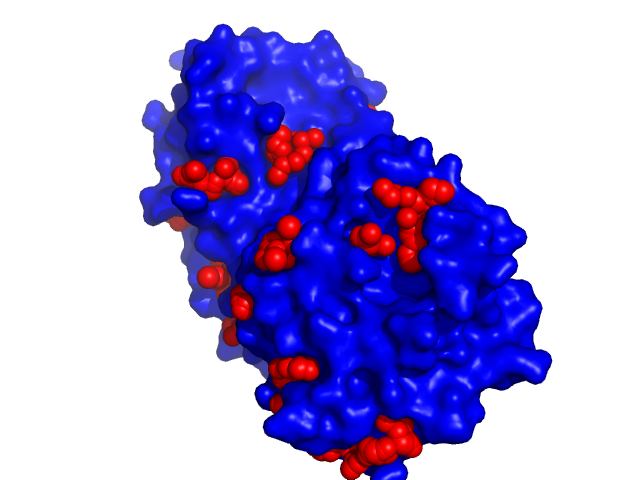

In [9]:
pockets = pd.read_csv('pockets/experimental_structure_scores.csv')
proteins = pockets['protein'].unique()

for protein in proteins:
    save_protein_pockets_to_pymol(protein=protein, path_stem='experimental_structures/', extension='.pse')
    save_protein_pockets_to_pymol(protein=protein, path_stem='experimental_structures/', extension='.pdb')

pymol.display()
pockets